Importing Necessary Dependencies

In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import metrics
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

Reading and Preprocessing the Imagery Data

In [85]:
train_dir = r'C:\Users\FELIX SAM(TECH WATT)\Desktop\nutrition data'

image_size = (224, 224)
batch_size = 8

datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

train_generator = datagen.flow_from_directory(train_dir, target_size=image_size, batch_size=batch_size,
                                              class_mode='categorical')

Found 101 images belonging to 2 classes.


Applying a Callback Function For EarlyStopping

In [87]:
earlystop = EarlyStopping(
    patience=10,
    min_delta=0.01,
    restore_best_weights=True
)

DEFINING THE MODEL

In [88]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='sigmoid'))


c:\Users\FELIX SAM(TECH WATT)\Desktop\NUTRISCAN\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


COMPILING AND TRAINING THE MODEL

In [89]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Precision(), metrics.Recall(), metrics.F1Score()])
history = model.fit(train_generator, epochs=100, callbacks=[earlystop])
model.save("model.h5")

Epoch 1/100


c:\Users\FELIX SAM(TECH WATT)\Desktop\NUTRISCAN\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 503ms/step - accuracy: 0.6805 - f1_score: 0.5737 - loss: 0.8443 - precision: 0.5726 - recall: 0.5571
Epoch 2/100


c:\Users\FELIX SAM(TECH WATT)\Desktop\NUTRISCAN\venv\lib\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,f1_score,loss,precision,recall
  current = self.get_monitor_value(logs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 472ms/step - accuracy: 0.6677 - f1_score: 0.4322 - loss: 0.6724 - precision: 0.6549 - recall: 0.6768
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 466ms/step - accuracy: 0.7070 - f1_score: 0.4133 - loss: 0.5722 - precision: 0.7070 - recall: 0.7070
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 458ms/step - accuracy: 0.6933 - f1_score: 0.4277 - loss: 0.8445 - precision: 0.6934 - recall: 0.6933
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 468ms/step - accuracy: 0.7821 - f1_score: 0.4645 - loss: 0.5612 - precision: 0.7800 - recall: 0.7746
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 471ms/step - accuracy: 0.8279 - f1_score: 0.7797 - loss: 0.5105 - precision: 0.8477 - recall: 0.6592
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 479ms/step - accuracy: 0.8043 - f1_score: 0.6881 - loss: 0.4650 - precision: 0.7972 - recall: 0.7654
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 465ms/step - accuracy: 0.7117 - f1_score: 0.5080 - loss: 0.4838 - precision: 0.7152 - recall: 0.6805
Epoch 9/10

Accessing and ploting model Accuracy and loss

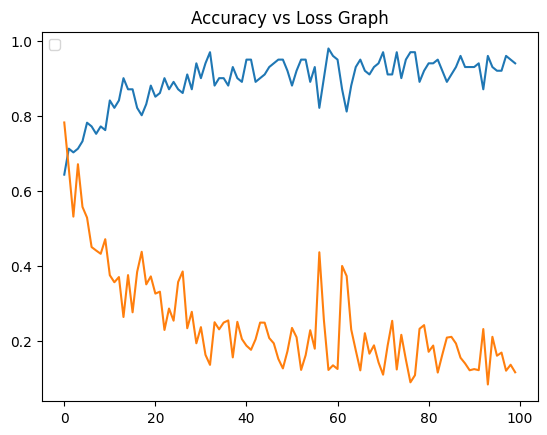

In [103]:

acc = history.history['accuracy']
loss = history.history['loss']
f1_score = history.history['f1_score']
precition = history.history['precision']
recall = history.history['recall']
plt.legend(loc="upper left")
plt.title('Accuracy vs Loss Graph')
plt.plot(acc)
plt.plot(loss)
plt.show()


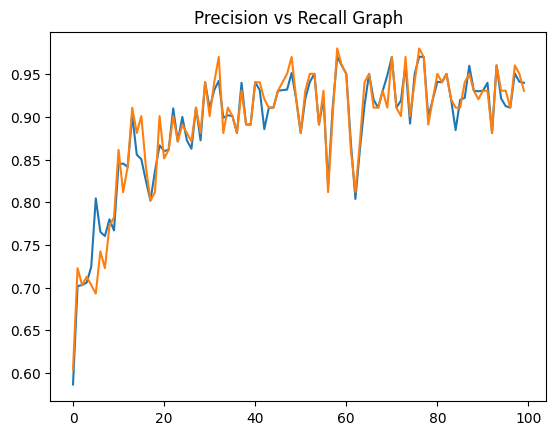

In [105]:
plt.title('Precision vs Recall Graph')
plt.plot(precition)
plt.plot(recall)
plt.show()

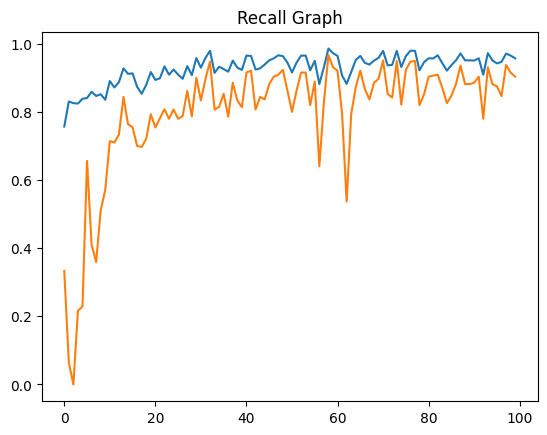

In [104]:
plt.title('Recall Graph')
plt.plot(f1_score)
plt.show()

Loading the trained Model and preprocessing single image for testing

In [96]:
model_path = 'model.h5'
model = tf.keras.models.load_model(model_path)

test_img_path = r'C:\Users\FELIX SAM(TECH WATT)\Desktop\nutrition data\malnourish\image15.jpeg'
img = image.load_img(test_img_path, target_size=(224, 224))
img_array1 = image.img_to_array(img)
img_array = np.expand_dims(img_array1, axis=0)
preprocessed_test_img = img_array / 255.0 


Runnining test on the Processed image for Prediction

In [97]:
names = train_generator.class_indices
first_name = list(names.keys())[0]
second_name = list(names.keys())[1]
class_names = [first_name, second_name]

predictions = np.ravel(model.predict(preprocessed_test_img))

if predictions[0] > predictions[1]:
    result = class_names[0]
else: result = class_names[1]
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


'malnourish'